Problem Statement: To expose the best combination for strategy games available in the AppStore in order to get a good user rating (4.0/5.0 and above).

* Perform Data Preparation by cleaning the data and removing null values.

* Identify Which genres have higher user ratings.

* Identify the trend of user ratings based on pricing.

* State your inferences.



Submitted By:- Lakshya Agarwal


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
from google.colab import files 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
file=files.upload()

Saving appstore_games (2).csv to appstore_games (2).csv


In [ ]:
dataset=pd.read_csv("appstore_games (2).csv") #reading the dataset
print(dataset.head())

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [ ]:
print(dataset.isnull().sum())
# Printing all the null values

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64


In [ ]:
# Removing of unwanted coloumn
dataset.drop(columns=[ 'URL', 'ID', 'Icon URL', 'Description', 'Developer', "Primary Genre"], inplace=True)
print(dataset.head())

            Name  ...  Current Version Release Date
0         Sudoku  ...                    30/05/2017
1        Reversi  ...                    17/05/2018
2        Morocco  ...                     5/09/2017
3  Sudoku (Free)  ...                    30/05/2017
4   Senet Deluxe  ...                    22/07/2018

[5 rows x 11 columns]


In [ ]:
dataset.drop_duplicates(inplace=True)
print(dataset.isnull().sum())

Name                            0
Average User Rating             0
User Rating Count               0
Price                           0
In-app Purchases                0
Age Rating                      0
Languages                       0
Size                            0
Genres                          0
Original Release Date           0
Current Version Release Date    0
dtype: int64


In [ ]:
dataset["Languages"].fillna(method='ffill', inplace=True)
dataset["Size"].fillna(dataset["Size"].mean(), inplace=True)
dataset["In-app Purchases"].fillna(0, inplace=True)
dataset["Price"].fillna(0, inplace=True)

In [ ]:
print(dataset.isnull().sum())

Name                            0
Average User Rating             0
User Rating Count               0
Price                           0
In-app Purchases                0
Age Rating                      0
Languages                       0
Size                            0
Genres                          0
Original Release Date           0
Current Version Release Date    0
dtype: int64


In [ ]:
dataset.dropna(inplace=True)
print(dataset.isnull().sum())

Name                            0
Average User Rating             0
User Rating Count               0
Price                           0
In-app Purchases                0
Age Rating                      0
Languages                       0
Size                            0
Genres                          0
Original Release Date           0
Current Version Release Date    0
dtype: int64


In [ ]:
value = dataset[dataset["User Rating Count"] < 300].index
dataset.drop(index=value, inplace=True)
# Removing Outliers Based On User Count Rating

In [ ]:
# Converting DateStrings to datetime
import datetime
dataset["ReleaseDate"] = pd.to_datetime(dataset["Original Release Date"])
dataset["CurrentVersionReleaseDate"] = pd.to_datetime(dataset["Current Version Release Date"])
dataset["Update_Gap"] = dataset["CurrentVersionReleaseDate"] - dataset["ReleaseDate"]
value = dataset[dataset["Update_Gap"] < datetime.timedelta(days=180)].index
dataset.drop(index=value, inplace=True)

In [ ]:
# Simplifying Genres
dataset["Genres"] = dataset['Genres'].str.replace(',', '').str.replace('Entertainment', ''). \
    str.replace('Games', '').str.replace('Strategy', '')
dataset["Genres"] = dataset["Genres"].str.split(' ').map(lambda x_: ' '.join(sorted(x_)))
dataset["Genres"] = dataset["Genres"].str.strip()
Genres = dataset[~dataset.Genres.str.contains('Puzzle') & \
                 ~dataset.Genres.str.contains('Action') & \
                 ~dataset.Genres.str.contains('Family') & \
                 ~dataset.Genres.str.contains('Education') & \
                 ~dataset.Genres.str.contains('Family') & \
                 ~dataset.Genres.str.contains('Adventure') & \
                 ~dataset.Genres.str.contains('Board') & \
                 ~dataset.Genres.str.contains('Role')].index


In [ ]:
dataset.drop(Genres, inplace=True)
dataset.loc[dataset['Genres'].str.contains('Puzzle'), 'Genres'] = 'Puzzle'
dataset.loc[dataset['Genres'].str.contains('Board'), 'Genres'] = 'Puzzle'
dataset.loc[dataset['Genres'].str.contains('Action'), 'Genres'] = 'Action'
dataset.loc[dataset['Genres'].str.contains('Adventure'), 'Genres'] = 'Adventure'
dataset.loc[dataset['Genres'].str.contains('Role'), 'Genres'] = 'Adventure'
dataset.loc[dataset['Genres'].str.contains('Family'), 'Genres'] = 'Family'
dataset.loc[dataset['Genres'].str.contains('Education'), 'Genres'] = 'Family'


In [ ]:
# Genres and Quantity
x = ['Puzzle', 'Action', 'Adventure', 'Family']
y = [dataset["Genres"][(dataset['Genres'] == 'Puzzle')].count(),
     dataset["Genres"][(dataset['Genres'] == 'Action')].count(),
     dataset["Genres"][(dataset['Genres'] == 'Adventure')].count(),
     dataset["Genres"][(dataset['Genres'] == 'Family')].count()]


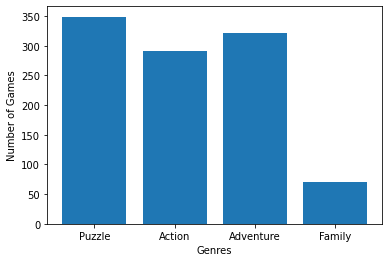

In [ ]:
plt.bar(x, y)
plt.xlabel('Genres')
plt.ylabel('Number of Games')
plt.show()

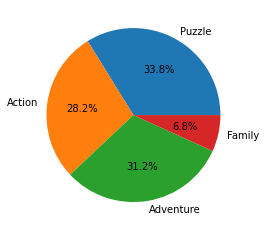

In [ ]:
plt.pie(y, labels=x, autopct='%1.1f%%')
plt.show()

The above pie chart represents the distribution of games in above stated genres, and it's order is 
Puzzle>Action>Adventure>Family

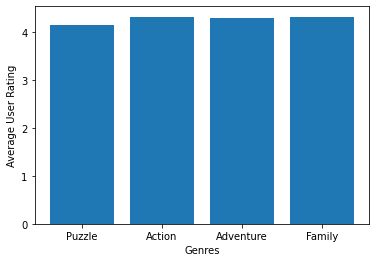

In [ ]:
# Genre Vs Average User Ratings
x = ['Puzzle', 'Action', 'Adventure', 'Family']
y = [dataset["Average User Rating"][(dataset['Genres'] == 'Puzzle')].mean(),
     dataset["Average User Rating"][(dataset['Genres'] == 'Action')].mean(),
     dataset["Average User Rating"][(dataset['Genres'] == 'Adventure')].mean(),
     dataset["Average User Rating"][(dataset['Genres'] == 'Family')].mean()]
plt.bar(x, y)
plt.xlabel('Genres')
plt.ylabel('Average User Rating')
plt.show()

Average Rating based on Genre shows Action and Family games have slightly higher User Rating compared to Puzzle and Adventure games

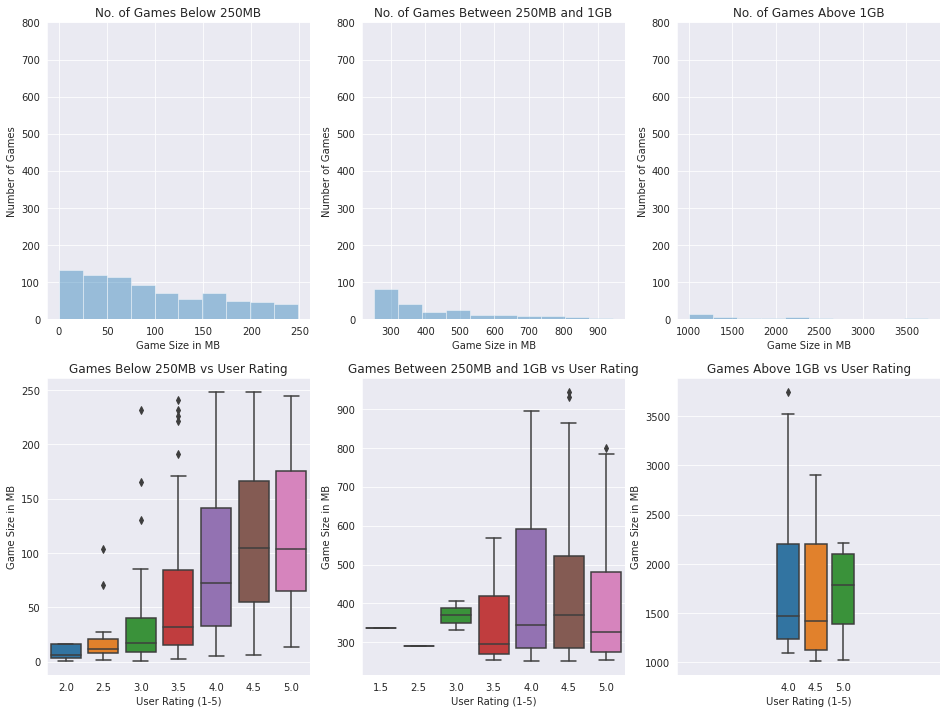

In [ ]:
# Pre-processing Size
dataset['Size2'] = round(dataset['Size'] / 1000000, 1)
Size_Less_250MB = dataset[dataset.Size2 < 250]
Size_More_250MB = dataset[(dataset.Size2 >= 250) & (dataset.Size2 < 1000)]
Size_More_1GB = dataset[dataset.Size2 >= 1000]

sns.set_style('darkgrid')
f, axes = plt.subplots(2, 3, figsize=(16, 12))

vis1 = sns.boxplot(data=Size_Less_250MB, x='Average User Rating', y='Size2', ax=axes[1, 0])
vis2 = sns.boxplot(data=Size_More_250MB, x='Average User Rating', y='Size2', ax=axes[1, 1])
vis3 = sns.boxplot(data=Size_More_1GB, x='Average User Rating', y='Size2', ax=axes[1, 2], )
vis4 = sns.distplot(Size_Less_250MB.Size2, bins=10, kde=False, ax=axes[0, 0])
vis5 = sns.distplot(Size_More_250MB.Size2, bins=10, kde=False, ax=axes[0, 1])
vis6 = sns.distplot(Size_More_1GB.Size2, bins=10, kde=False, ax=axes[0, 2])

vis1.set(xlabel='User Rating (1-5)', ylabel='Game Size in MB')
vis2.set(xlabel='User Rating (1-5)', ylabel='Game Size in MB')
vis3.set(xlabel='User Rating (1-5)', ylabel='Game Size in MB')
vis4.set(xlabel='Game Size in MB', ylabel='Number of Games')
vis5.set(xlabel='Game Size in MB', ylabel='Number of Games')
vis6.set(xlabel='Game Size in MB', ylabel='Number of Games')

axes[0, 0].set_title('No. of Games Below 250MB')
axes[0, 1].set_title('No. of Games Between 250MB and 1GB')
axes[0, 2].set_title('No. of Games Above 1GB')
axes[1, 0].set_title('Games Below 250MB vs User Rating')
axes[1, 1].set_title('Games Between 250MB and 1GB vs User Rating')
axes[1, 2].set_title('Games Above 1GB vs User Rating')
vis3.set(xlim=(-4, 5.5))

vis4.set(ylim=(0, 800))
vis5.set(ylim=(0, 800))
vis6.set(ylim=(0, 800))
plt.show()


# Size Factor:-

1.) From the visualization, we can see that most of the game are below 250MB In which to achieve score 4 and above it has to be 100MB and above.

2.)Second column of the chart shows that good games (score >4) have to be 600MB and above, with the exception

3.)A very small portion of games (less than 100 titles) are above 1GB, in which the minimum score for the game is 4 This might be due to the user sentiment who gives credit to the huge game content and possibly better game graphics.


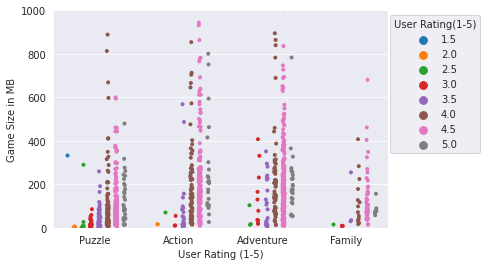

In [ ]:
# Game Size vs User Rating
vis1= sns.stripplot(y='Size2' , x=dataset.Genres, data=dataset,\
                hue=dataset["Average User Rating"],dodge=True, size=4)

plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.29, 1))

vis1.set(ylim=(0, 1000))
vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
plt.show()

From above, we can easily say that more than half of the games from these 4 genre gets a score of 4 and above, in which the majority focuses on size 400MB and below. With the exception of Action which still gets good rating up to 600MB, and Adventure game up to 800MB. Family (and education) genre has the least number of games in the store, and a 200MB size is sufficient to get score of 4.0 and above.

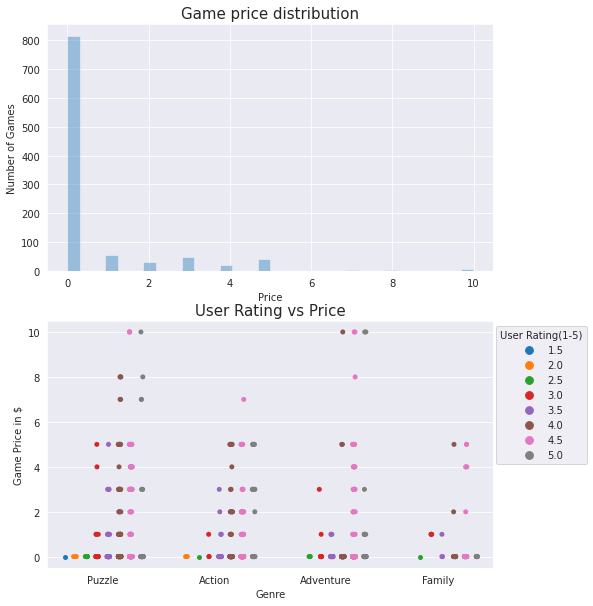

In [ ]:
# User Rating Vs Price
h, axes = plt.subplots(2, 1, figsize=(8, 10))

vis1 = sns.distplot(dataset.Price, kde=None, ax=axes[0])
vis2 = sns.stripplot(y=dataset.Price, x=dataset.Genres, data=dataset, ax=axes[1],
                     hue=dataset["Average User Rating"], dodge=1)

vis1.set(xlabel='Price', ylabel='Number of Games')
vis2.set(xlabel='Genre', ylabel='Game Price in $')

axes[0].set_title('Game price distribution', fontsize=15)
axes[1].set_title('User Rating vs Price', fontsize=15)
plt.legend(title='User Rating(1-5)', bbox_to_anchor=(1.22, 1))
plt.show()


# From the above distribution ,the trend of user rating with respect to price becomes better as the game price increase.

# Inferences Made:-


*  Games above 1GB have good ratings and has above 3.5 scores.
*  Most of the games are of prices below 1$ to earn better income.

*  Paid Games tend to have better reviews , specially those above 6$ have user rating of more than 4.0
*   For simpler games, focus on size between 100MB to 150MB of contents
* For more complex games, target a content of 500MB and above





